# KNN의 개념과 원리 

# 개념

- 지도 학습 중 하나로서 데이터 분류를 위한 알고리즘

- 사례기반 학습법

- 거리 측정 시 유클리디안 거리 계산법을 사용하나, 자료특성에 따라 다른 응용된 거리 계산법을 사용하기도 함


## 유클리디안 거리 (Euclidean distance)

두 점의 X와 Y의 값을 차를 제곱한 것의 합에 루트를 씌움




2차원 평면에 서로 다른 두 점 A(x1, y1)와 B(x2, y2)가 있을 때 이 둘의 거리 d는 유클리드 거리 계산법에 의해 다음과 같이 나온다.


 


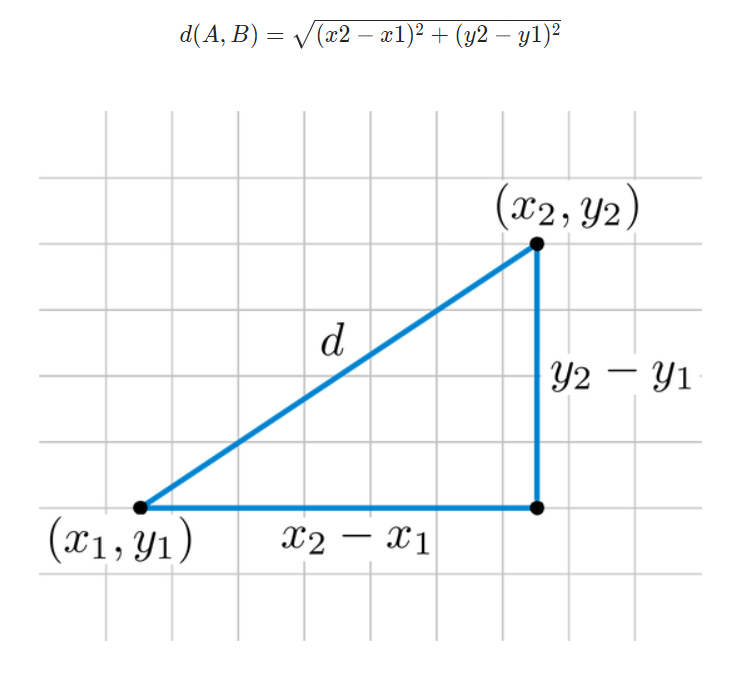

# 실습과 시각화

In [1]:
data<-read.csv("data/vote.csv", header=T)


In [2]:
data<-data[ , 1:9]


In [3]:
head(data)

gender,region,edu,income,age,score_gov,score_progress,score_intention,vote
1,4,3,3,3,2,2,4.0,1
1,5,2,3,3,2,4,3.0,0
1,3,1,2,4,1,3,2.8,1
2,1,2,1,3,5,4,2.6,1
1,1,1,2,4,4,3,2.4,1
1,1,1,2,4,1,4,3.8,1


In [4]:
str(data)

'data.frame':	211 obs. of  9 variables:
 $ gender         : int  1 1 1 2 1 1 1 1 1 1 ...
 $ region         : int  4 5 3 1 1 1 1 5 2 1 ...
 $ edu            : int  3 2 1 2 1 1 1 2 1 1 ...
 $ income         : int  3 3 2 1 2 2 2 4 2 2 ...
 $ age            : int  3 3 4 3 4 4 4 4 4 3 ...
 $ score_gov      : int  2 2 1 5 4 1 4 3 2 4 ...
 $ score_progress : int  2 4 3 4 3 4 4 4 2 2 ...
 $ score_intention: num  4 3 2.8 2.6 2.4 3.8 2 3.6 2 3 ...
 $ vote           : int  1 0 1 1 1 1 1 1 0 1 ...


In [5]:
summary(data)

     gender          region           edu            income     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :1.000   Median :1.000   Median :2.000   Median :2.000  
 Mean   :1.341   Mean   :2.052   Mean   :1.867   Mean   :2.209  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:3.000  
 Max.   :2.000   Max.   :5.000   Max.   :3.000   Max.   :4.000  
      age          score_gov     score_progress  score_intention
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:3.000   1st Qu.:2.000   1st Qu.:2.400  
 Median :3.000   Median :3.000   Median :3.000   Median :3.000  
 Mean   :2.654   Mean   :3.057   Mean   :3.095   Mean   :2.911  
 3rd Qu.:3.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:3.400  
 Max.   :4.000   Max.   :5.000   Max.   :5.000   Max.   :5.000  
      vote       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :1.0000  
 Mean   :0.7109  


In [6]:
install.packages("caret")

also installing the dependencies 'ipred', 'recipes'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
ipred   0.9-11 0.9-12              TRUE
recipes 0.1.16 0.1.17             FALSE
caret   6.0-86 6.0-90              TRUE

  Binaries will be installed
package 'ipred' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpaS3H9z\downloaded_packages


installing the source package 'recipes'

Warning message in install.packages("caret"):
"installation of package 'recipes' had non-zero exit status"

In [7]:
install.packages("dplyr")


  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.6  1.0.7              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\MyCom\anaconda3\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll를 C:\Users\MyCom\anaconda3\Lib\R\library\dplyr\libs\x64\dplyr.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpaS3H9z\downloaded_packages


In [8]:
library(caret)
library(dplyr)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2


ERROR: Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'recipes' 0.1.5 is being loaded, but >= 0.1.10 is required


In [ ]:
set.seed(42)

In [ ]:
training.samples <- createDataPartition(data$vote, p = 0.7, list = FALSE)
training.samples

In [11]:
install.packages("installr")


package 'installr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpaS3H9z\downloaded_packages


In [12]:
library(installr)

Warning message:
"package 'installr' was built under R version 3.6.3"
Welcome to installr version 0.23.2

More information is available on the installr project website:
https://github.com/talgalili/installr/

Contact: <tal.galili@gmail.com>
Suggestions and bug-reports can be submitted at: https://github.com/talgalili/installr/issues

			To suppress this message use:
			suppressPackageStartupMessages(library(installr))



In [ ]:
version

In [ ]:
install.R()